In [1]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import tensorflow as tf
from tensorflow import keras

#file tools
import os
import pickle

#Use jupyter's backend to render plots
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
#import matplotlib.lines as mlines
#import seaborn as sns; sns.set(color_codes=True)
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import mean_squared_error

#for audio recording
import wave  
#!pip install pyaudio
#import pyaudio
import sys
import librosa
import librosa.display
import IPython.display as ipd  # To play sound in the notebook

import warnings;
warnings.filterwarnings("ignore") #clear warnings

In [3]:
!git clone https://github.com/ebtesam25/hackCU2021.git

fatal: destination path 'hackCU2021' already exists and is not an empty directory.


In [4]:
#run cell everytime to pull update from repo
%cd
%cd /content
%cd hackCU2021
!git pull
%cd notebooks

/root
/content
/content/hackCU2021
Already up to date.
/content/hackCU2021/notebooks


In [5]:
path_notebooks = '/content/hackCU2021/notebooks/'
#os.listdir('/content/hackCU2021/notebooks/') #lists directory
#MODEL_DIR_PATH = path_notebooks + "models/" #path to models
#EXAMPLES_PATH = path_notebooks + "audio/" #path to audio files
#os.listdir(EXAMPLES_PATH) #lists directory
from config import EXAMPLES_PATH
from config import MODEL_DIR_PATH
os.listdir(EXAMPLES_PATH) #lists directory

['examples_03-01-01-01-01-02-05.wav',
 'examples_10-16-07-29-82-30-63.wav',
 'angry_file.wav']

In [6]:
"""
from google.colab import drive
drive.mount('/content/drive')
"""

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [7]:
"""
# IMPOTRTANT: set the path where the data files are relative to the Notebook file. 
# You can change the variable pathname below to anything that suits you, For example,
# if your Notebook file is to be run on Google Colab, then you will need to set up
# this variable properly, e.g., 
#pathname = os.path.join('My Drive', 'hackcu').

#For Google Colab

from google.colab import drive
drive.mount('/content/gdrive') #already mounted, but need to remount if changing runtime
#print(os.listdir('.'))
pathname = 'gdrive/My Drive/hackcu/'
os.listdir('gdrive/My Drive/hackcu/') #lists directory


#for root folder
#pathname = '.'
"""

"\n# IMPOTRTANT: set the path where the data files are relative to the Notebook file. \n# You can change the variable pathname below to anything that suits you, For example,\n# if your Notebook file is to be run on Google Colab, then you will need to set up\n# this variable properly, e.g., \n#pathname = os.path.join('My Drive', 'hackcu').\n\n#For Google Colab\n\nfrom google.colab import drive\ndrive.mount('/content/gdrive') #already mounted, but need to remount if changing runtime\n#print(os.listdir('.'))\npathname = 'gdrive/My Drive/hackcu/'\nos.listdir('gdrive/My Drive/hackcu/') #lists directory\n\n\n#for root folder\n#pathname = '.'\n"

In [8]:
# Recreate the exact same model, including its weights and the optimizer
emotion_model = tf.keras.models.load_model(MODEL_DIR_PATH + "Emotion_Voice_Detection_Model.h5")
# Show the model architecture
emotion_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 40, 64)            384       
_________________________________________________________________
activation_1 (Activation)    (None, 40, 64)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2560)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 20488     
_________________________________________________________________
activation_2 (Activation)    (None, 8)                 0         
Total params: 20,872
Trainable params: 20,872
Non-trainable params: 0
__________________________________________________

In [9]:
#load 4s sound file and playback
data, sampling_rate = librosa.load(EXAMPLES_PATH +'angry_file.wav')
ipd.Audio(EXAMPLES_PATH +'angry_file.wav')

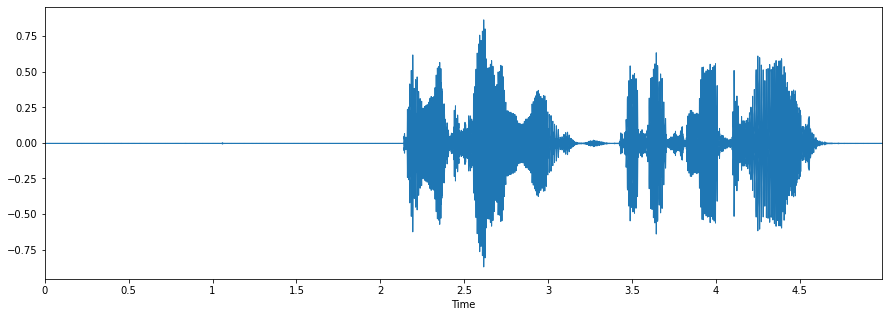

In [10]:
#visualise
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [11]:
!python live_predictions.py

2021-03-07 07:56:30.937359: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-03-07 07:56:33.497139: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-03-07 07:56:33.498082: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-03-07 07:56:33.509480: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-03-07 07:56:33.509531: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (86b836028787): /proc/driver/nvidia/version does not exist
2021-03-07 07:56:33.510045: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
Model: "sequential_1"
______________________________________________________

In [12]:
import keras
import librosa
import numpy as np

from config import EXAMPLES_PATH
from config import MODEL_DIR_PATH

class LivePredictions:
    """
    Main class of the application.
    """

    def __init__(self, file):
        """
        Init method is used to initialize the main parameters.
        """
        self.file = file
        self.path = MODEL_DIR_PATH + 'Emotion_Voice_Detection_Model.h5'
        self.loaded_model = keras.models.load_model(self.path)

    def make_predictions(self):
        """
        Method to process the files and create your features.
        """
        data, sampling_rate = librosa.load(self.file)
        mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40).T, axis=0)
        x = np.expand_dims(mfccs, axis=1)
        #x = np.expand_dims(mfccs, axis=2) #original code
        x = np.expand_dims(x, axis=0)
        predictions = self.loaded_model.predict_classes(x)
        print( "Prediction is", " ", self.convert_class_to_emotion(predictions))

    @staticmethod
    def convert_class_to_emotion(pred):
        """
        Method to convert the predictions (int) into human readable strings.
        """
        
        label_conversion = {'0': 'neutral',
                            '1': 'calm',
                            '2': 'happy',
                            '3': 'sad',
                            '4': 'angry',
                            '5': 'fearful',
                            '6': 'disgust',
                            '7': 'surprised'}

        for key, value in label_conversion.items():
            if int(key) == pred:
                label = value
        return label


if __name__ == '__main__':
    live_prediction = LivePredictions(file=EXAMPLES_PATH + 'angry_file.wav')
    live_prediction.loaded_model.summary()
    live_prediction.make_predictions()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 40, 64)            384       
_________________________________________________________________
activation_1 (Activation)    (None, 40, 64)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2560)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 20488     
_________________________________________________________________
activation_2 (Activation)    (None, 8)                 0         
Total params: 20,872
Trainable params: 20,872
Non-trainable params: 0
__________________________________________________

In [13]:
live_prediction = LivePredictions(file=EXAMPLES_PATH + 'examples_03-01-01-01-01-02-05.wav') #meant to be neutral
live_prediction.loaded_model.summary()
live_prediction.make_predictions()
live_prediction = LivePredictions(file=EXAMPLES_PATH + 'examples_10-16-07-29-82-30-63.wav') #meant to be digust
live_prediction.make_predictions()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 40, 64)            384       
_________________________________________________________________
activation_1 (Activation)    (None, 40, 64)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2560)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 20488     
_________________________________________________________________
activation_2 (Activation)    (None, 8)                 0         
Total params: 20,872
Trainable params: 20,872
Non-trainable params: 0
__________________________________________________

**Conclusion**, this model should perform at benchmark of 80% accuracy. This project presents a deep learning classifier able to predict the emotions of a human speaker encoded in an audio file. The classifier is trained using 2 different datasets, RAVDESS and TESS, and has an overall F1 score of 80% on 8 classes (neutral, calm, happy, sad, angry, fearful, disgust and surprised).

Awesomeopensource.com. (2018). marcogdepinto/emotion-classification-from-audio-files. [online] Available at: https://awesomeopensource.com/project/marcogdepinto/emotion-classification-from-audio-files [Accessed 7 Mar. 2021].

‌